## **Business Problem Description**

To Classify the health of a fetus as Normal, Suspect or Pathological using CTG data.

Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fetal_health_df = pd.read_csv('fetal_health.csv')

In [4]:
fetal_health_df.head()

baseline value  accelerations  ...  histogram_tendency  fetal_health
0           120.0          0.000  ...                 1.0           2.0
1           132.0          0.006  ...                 0.0           1.0
2           133.0          0.003  ...                 0.0           1.0
3           134.0          0.003  ...                 1.0           1.0
4           132.0          0.007  ...                 1.0           1.0

[5 rows x 22 columns]

In [5]:
fetal_health_df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [6]:
# Analyse statically insight of data
fetal_health_df.describe()

baseline value  accelerations  ...  histogram_tendency  fetal_health
count     2126.000000    2126.000000  ...         2126.000000   2126.000000
mean       133.303857       0.003178  ...            0.320320      1.304327
std          9.840844       0.003866  ...            0.610829      0.614377
min        106.000000       0.000000  ...           -1.000000      1.000000
25%        126.000000       0.000000  ...            0.000000      1.000000
50%        133.000000       0.002000  ...            0.000000      1.000000
75%        140.000000       0.006000  ...            1.000000      1.000000
max        160.000000       0.019000  ...            1.000000      3.000000

[8 rows x 22 columns]

**DataFrame.describe()** method generates descriptive statistics for only numeric values not for categorical values. This method summarizes the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Now, let's understand the statistics that are generated by the describe() method:

- Count tells us the number of NoN-empty rows in a feature. As we can see there are no NoN-empty rows.
- Mean tells us the mean value of that feature.
- Std tells us the Standard Deviation Value of that feature.
- Min tells us the minimum value of that feature.
- 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
- Max tells us the maximum value of that feature.


In [7]:
fetal_health_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**DataFrame.info()** method prints a concise summary of a DataFrame.This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [8]:
print(f"The dataset size: {fetal_health_df.shape}")

The dataset size: (2126, 22)


Property **DataFrame.shape** returns a tuple representing the dimensionality of the DataFrame.

## **Exploratory Data Analysis**

**Count the missing and null values**

Here, it is easy to count the missing and null values. In the case of a real-world dataset, it is very common that some values in the dataset are missing. We represent these missing values as NaN (Not a Number) values. But to build a good machine learning model our dataset should be complete. That is why we use some imputation techniques to replace the NaN values with some probable values.

In [9]:
# Count the missing and null values for dataset fetal health.
miss_values = fetal_health_df.columns[fetal_health_df.isnull().any()]
print(f"Missing values:\n{fetal_health_df[miss_values].isnull().sum()}")

null_values = fetal_health_df.columns[fetal_health_df.isna().any()]
print(f"Null values:\n{fetal_health_df[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


As the result, In this case, there are neither null values nor missing values in the dataset.

**Visualize missing values (NaN) using Missingno Library:**

We use **Missingno library** which offers a very nice way to visualize the distribution of NaN values. Missingno is a Python library and compatible with Pandas.

**Bar Chart :**

This bar chart gives us an idea about how many missing values are there in each column.

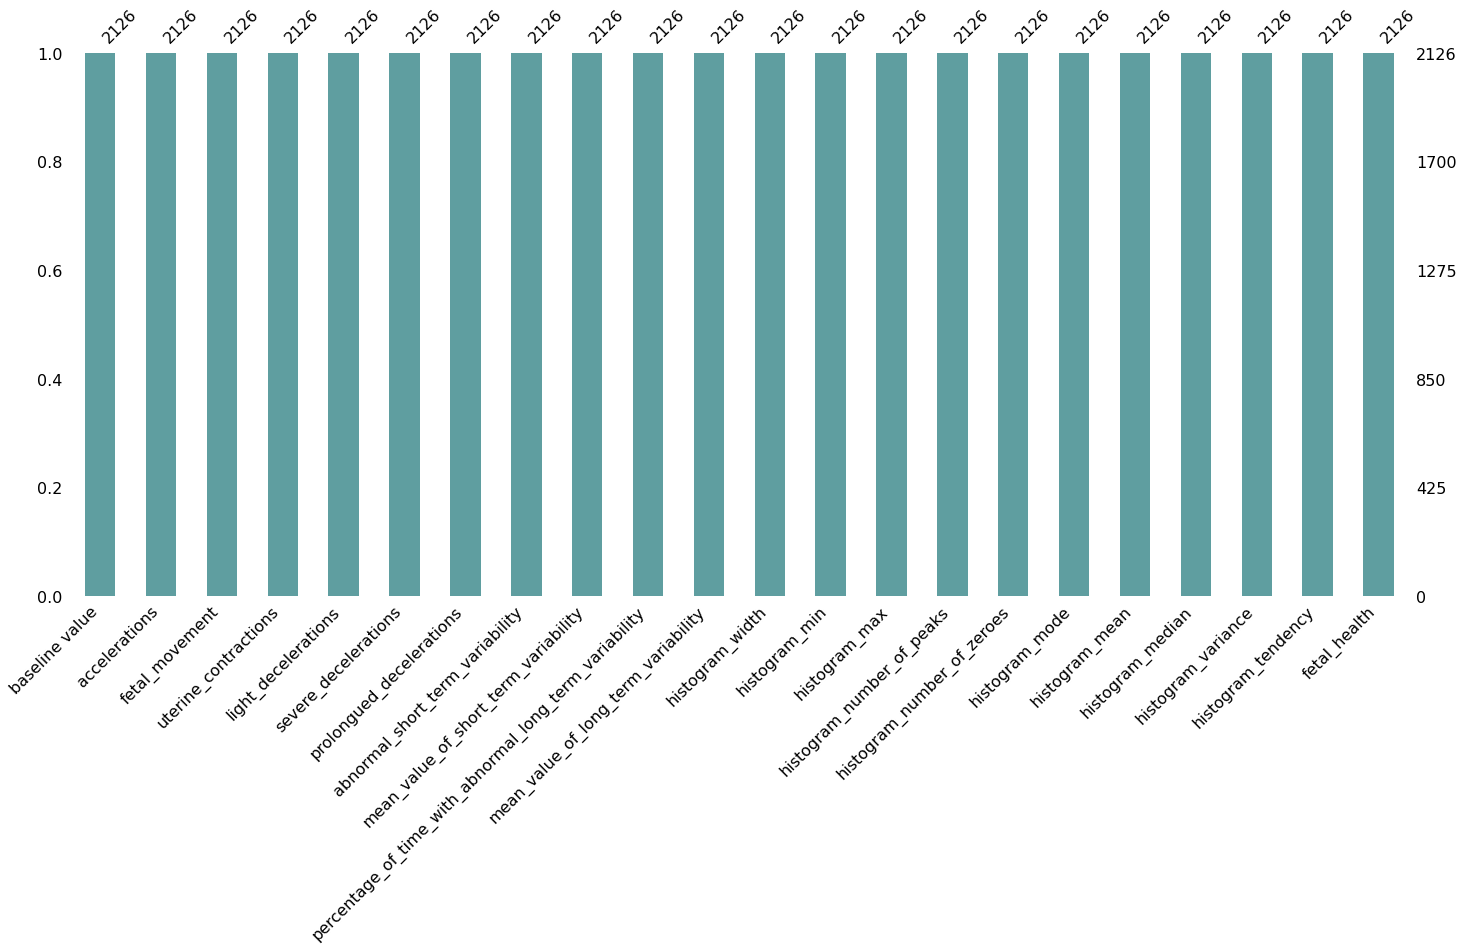

In [10]:
# Null count analysis
import missingno as msno
null_plot = msno.bar(fetal_health_df, color = "#5F9EA0")

**Hence, the dataset is clean, we would not need to clean it further.**

**Data visualizations of "fetal_health" column shows us the percentage of fetal health state.**

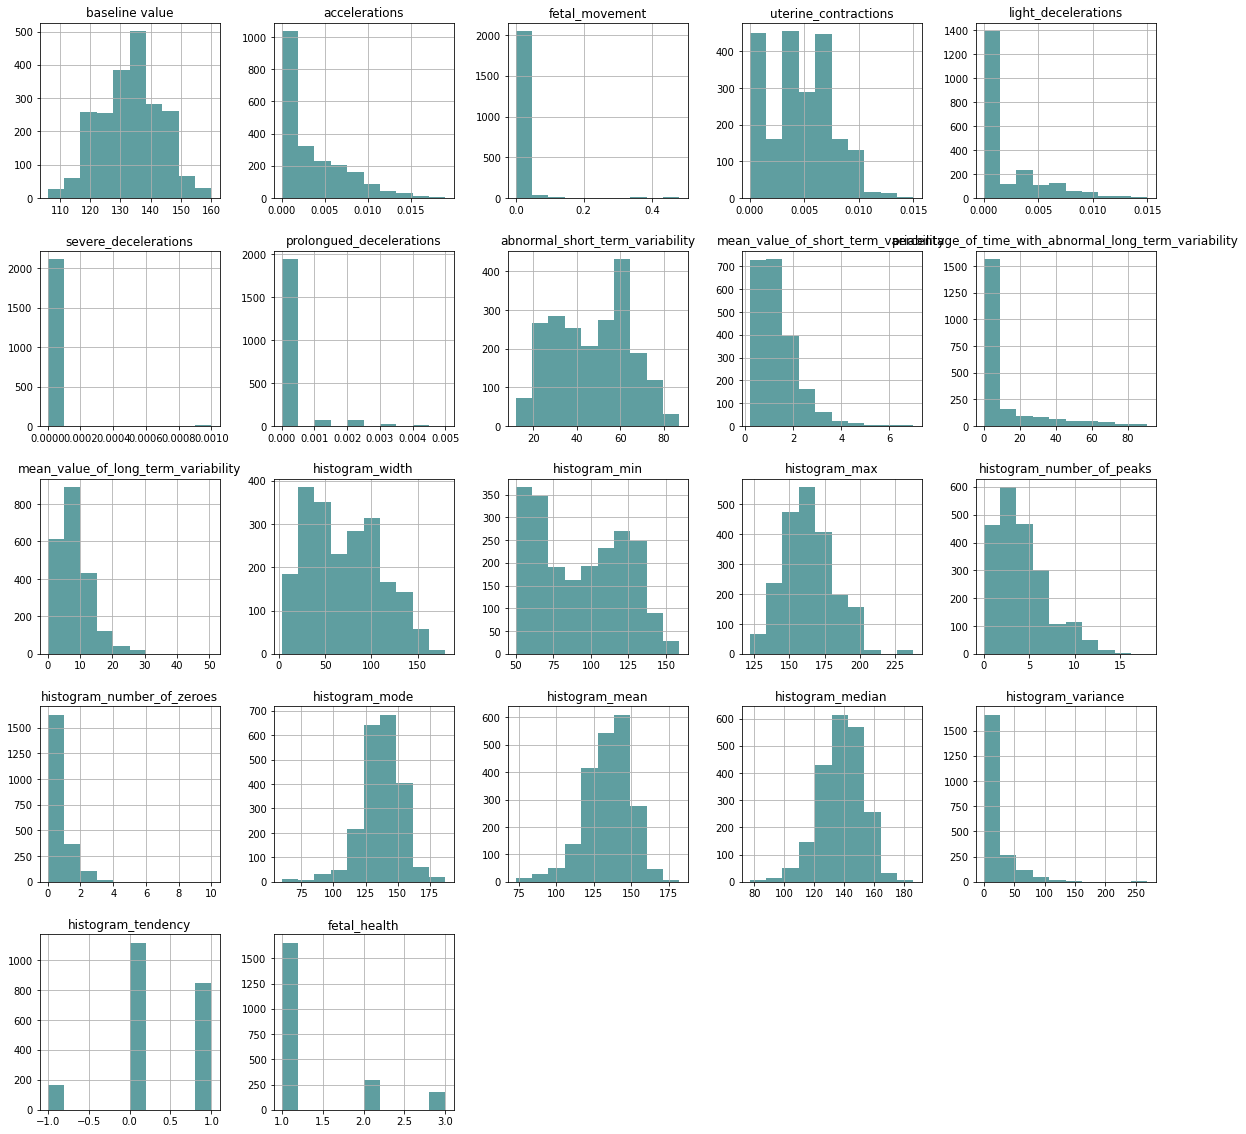

In [11]:
ata_hist_plot = fetal_health_df.hist(figsize = (20,20), color = "#5F9EA0")

**The important things we could learn about the above plot is Skewness. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. There are three types of skewed distributions. A right (or positive) skewed distribution, left (or negative) skewed distribution, and normal distribution.**

- A left-skewed distribution has a long-left tail. Left-skewed distributions are also called negatively skewed distributions. That is because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.
- A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That is because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.
- The skewness for a normal distribution is zero and looks a bell curve.

**Correlation Numeric features with output variable(fetal_health)**

Here, we want to show the correlation between numerical features and the target "fetal_health", in order to have a first idea of the connections between features. Just by looking at the heatmap below we can see some features have the dark colours, Those features have high correlation with the target.

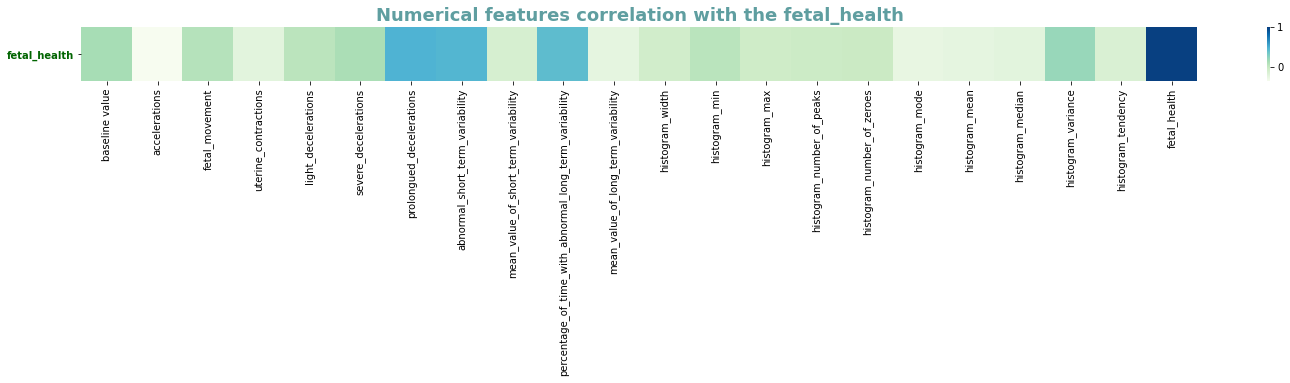

In [12]:
numeric_data = fetal_health_df.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [13]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

We can see three features: "prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" have high correlation with the target column (fetal_health).

**Scatter matrix**

A scatter plot matrix is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart.

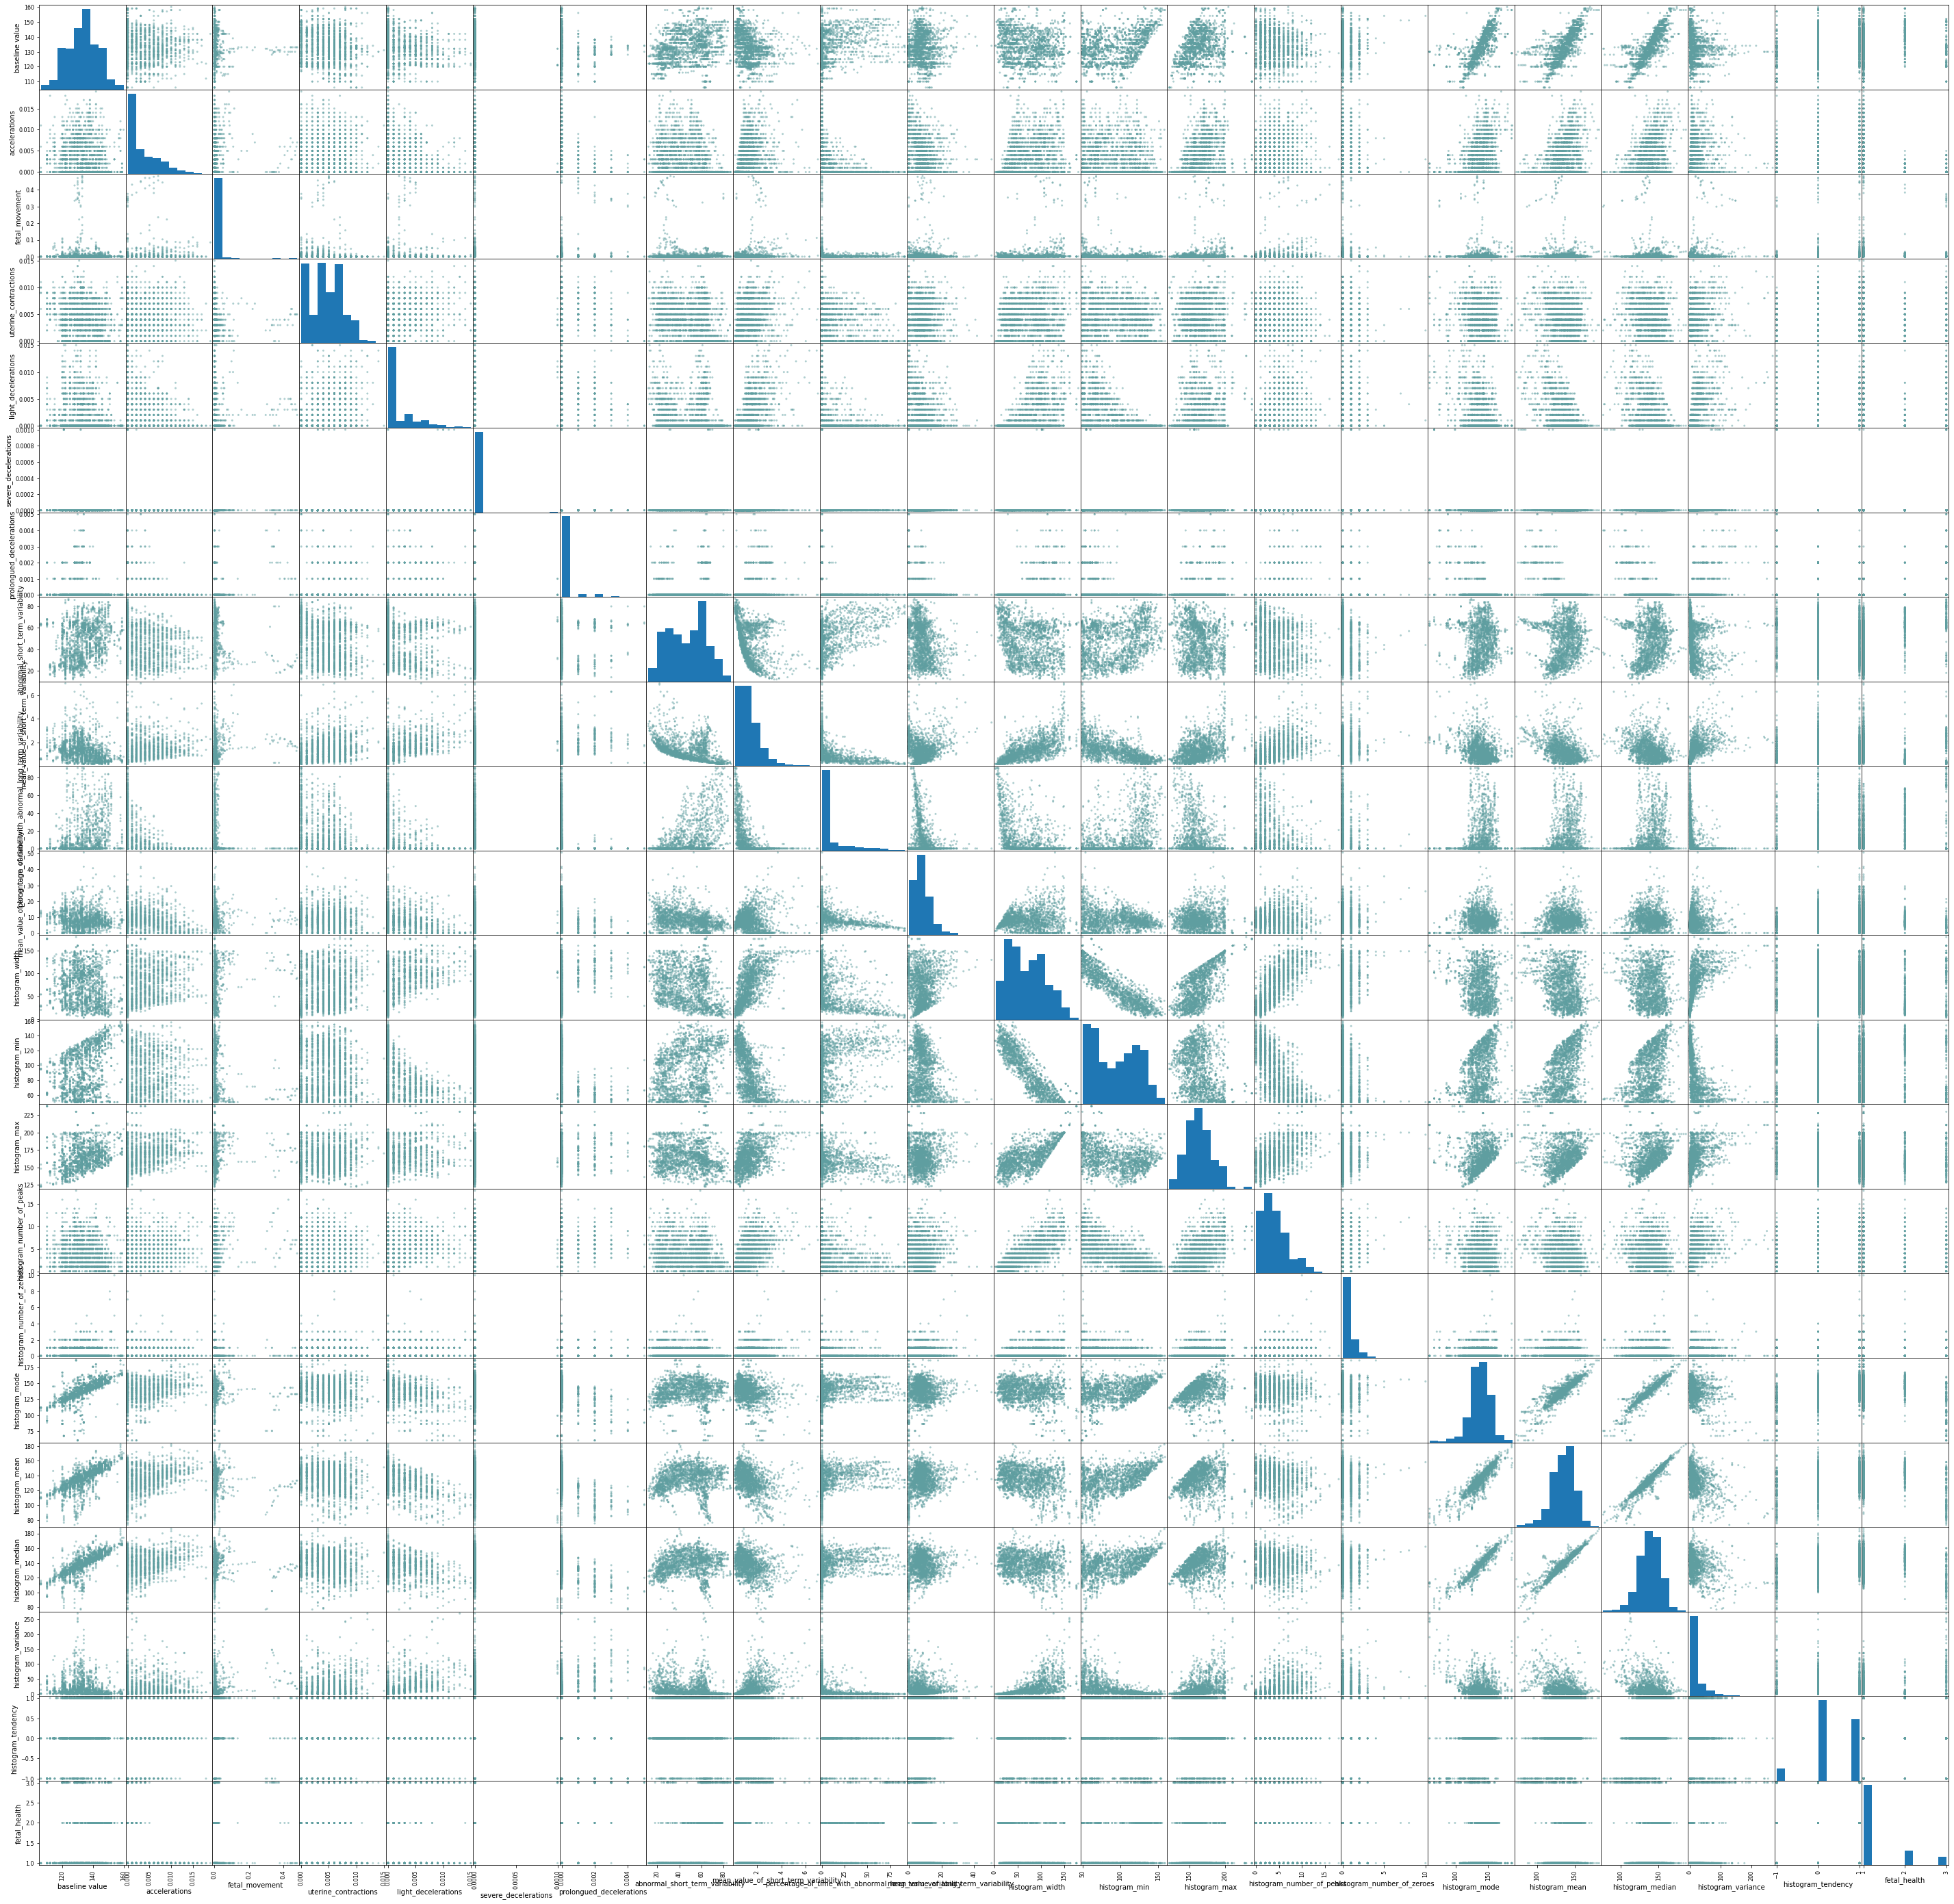

In [14]:
from pandas.plotting import scatter_matrix
scatterMatrix = scatter_matrix(fetal_health_df,figsize=(50, 50), color = "#5F9EA0")

**Heatmap**

A heat map is a two-dimensional representation of information with the help of colours. Heat maps can help the user visualize simple or complex information. Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.

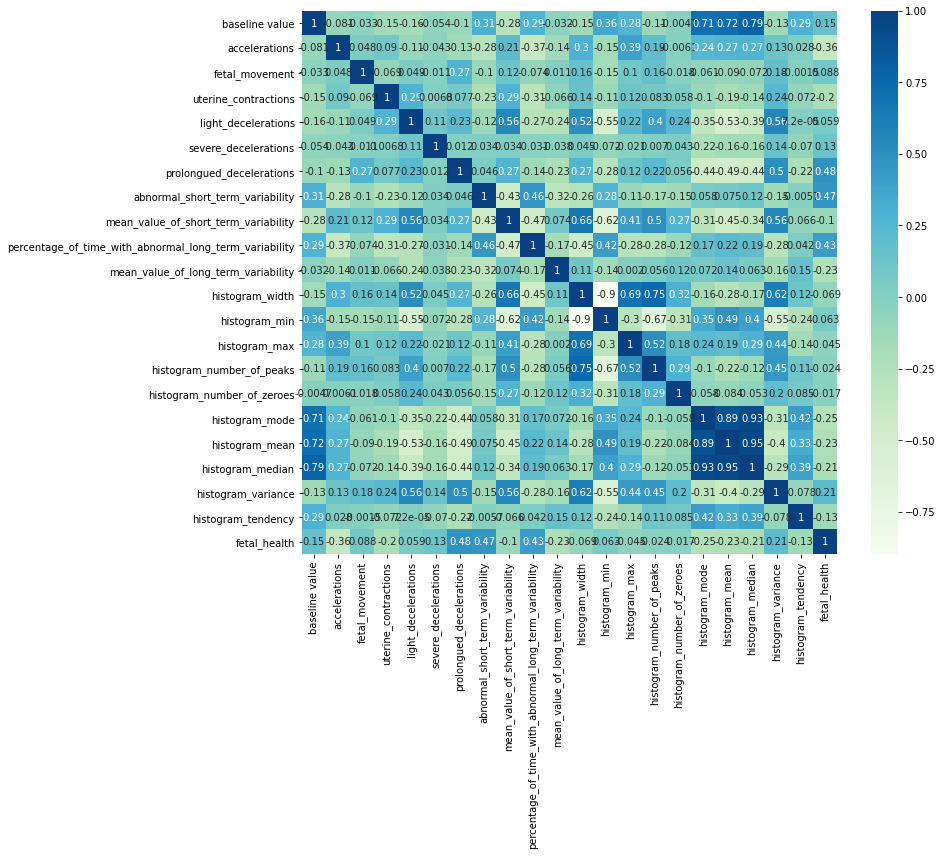

In [15]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(12,10))  

# Seaborn has very simple solution for heatmap
p=sns.heatmap(fetal_health_df.corr(), annot=True, cmap = "GnBu")  

Here, we can clearly see that 'histogram_mode', 'histogram_mean', 'histogram_median' are highly correlated, we might want to exclude them in future.

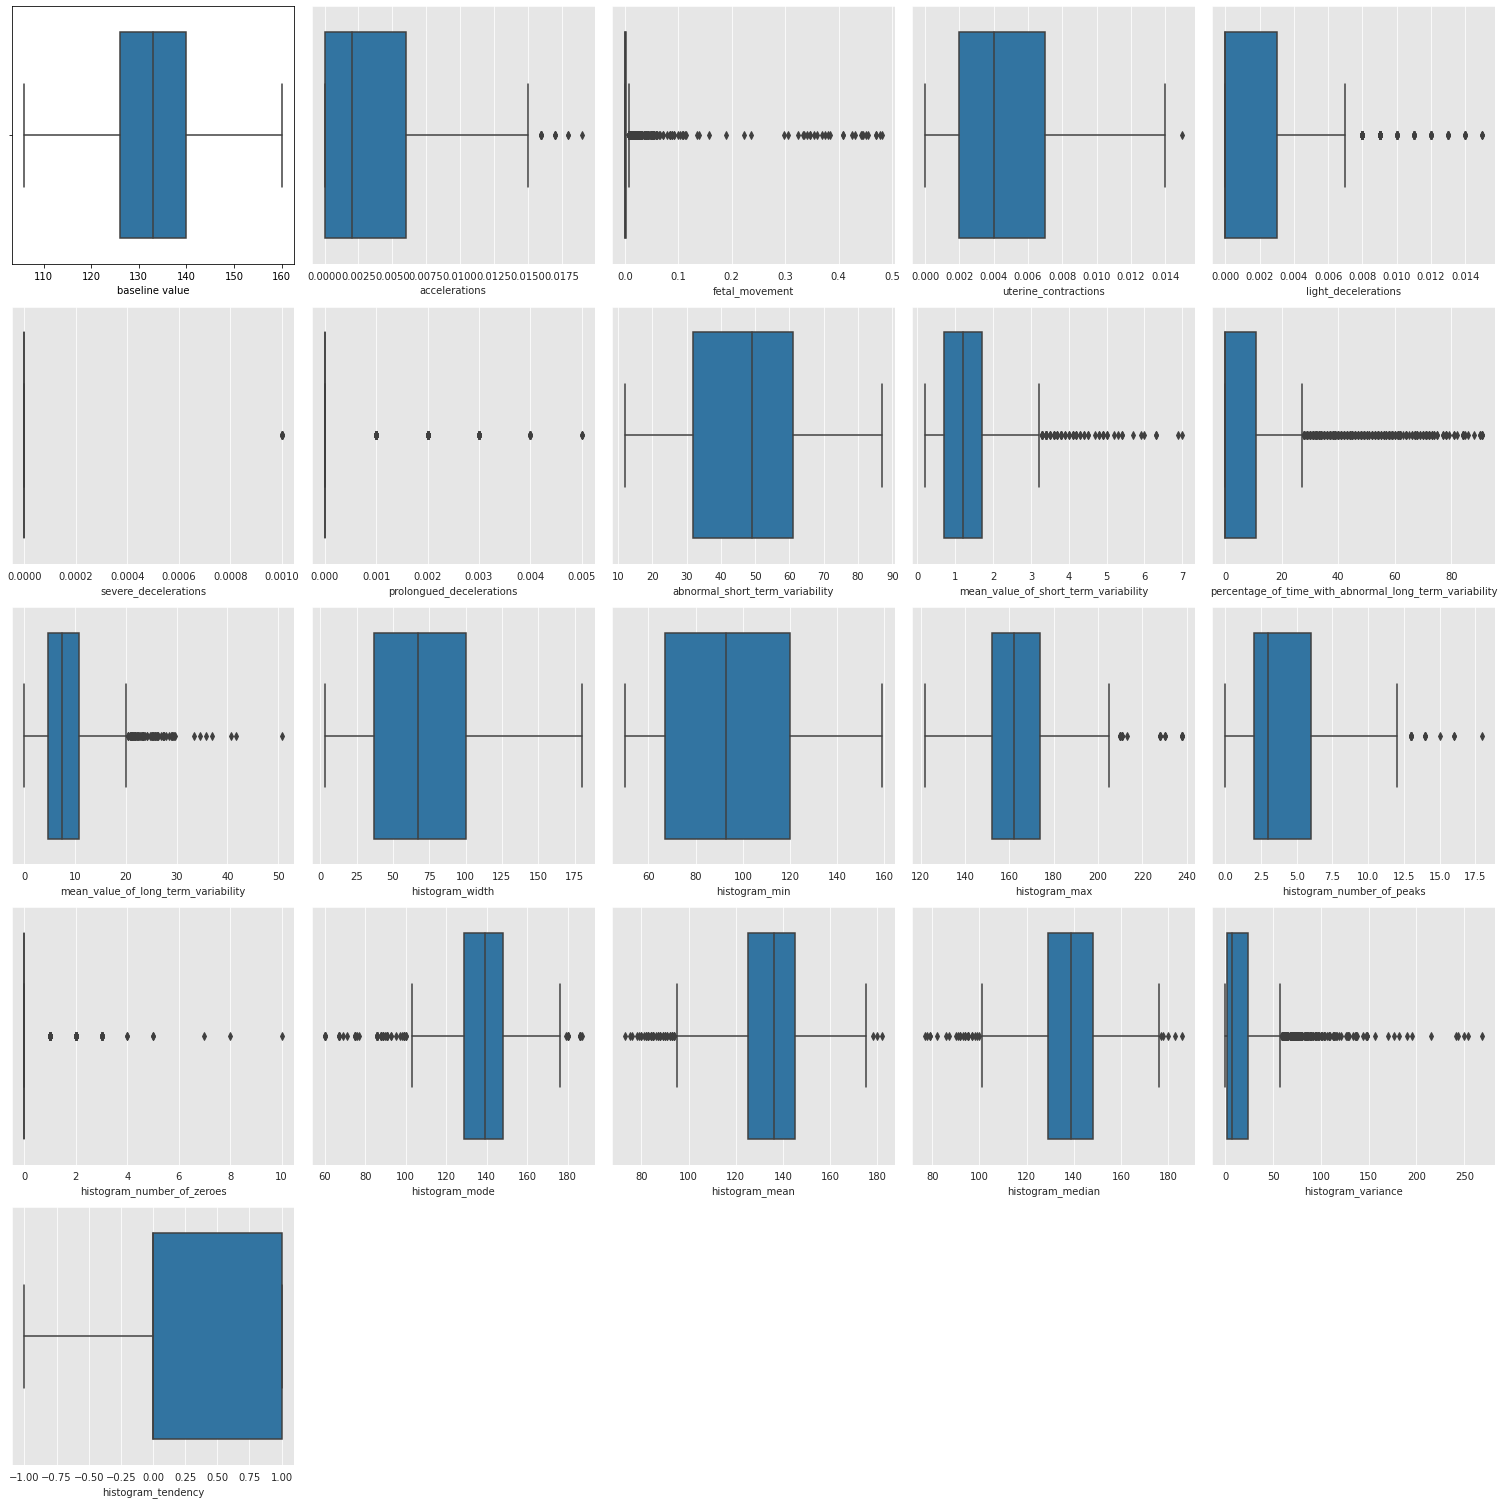

In [16]:
plt.figure(figsize=(21,21))
for i, col in enumerate(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']):
    plt.subplot(5,5,i+1)
    sns.axes_style()
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.boxplot(data=fetal_health_df,x=col)    
    plt.tight_layout()

**Insights**

- No null values, that is great.
- I do not think there are any outliers, in histogram_variance column, there are few values which looks like outliers but not very extreme values. Let us find more about it.

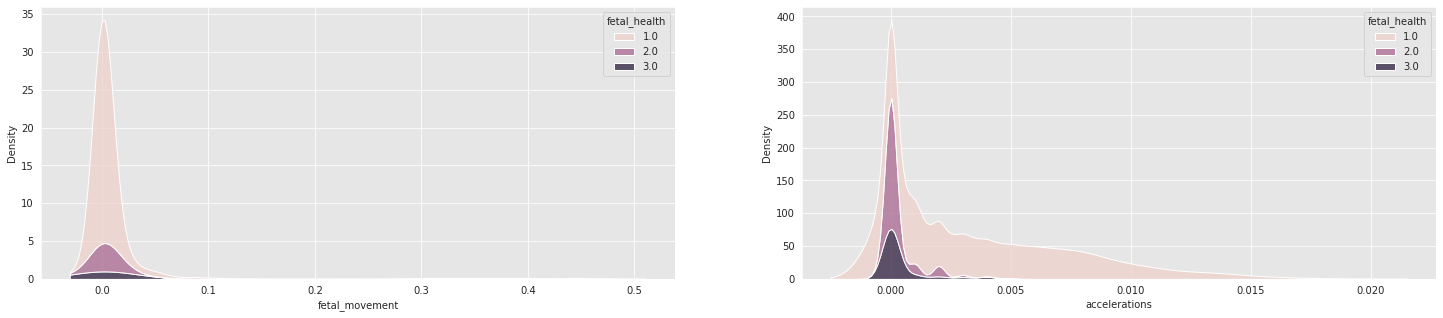

In [17]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.kdeplot(fetal_health_df['fetal_movement'],ax=ax[0],hue=fetal_health_df['fetal_health'],multiple="stack");
sns.kdeplot(fetal_health_df["accelerations"],ax=ax[1],hue=fetal_health_df['fetal_health'],multiple="stack");

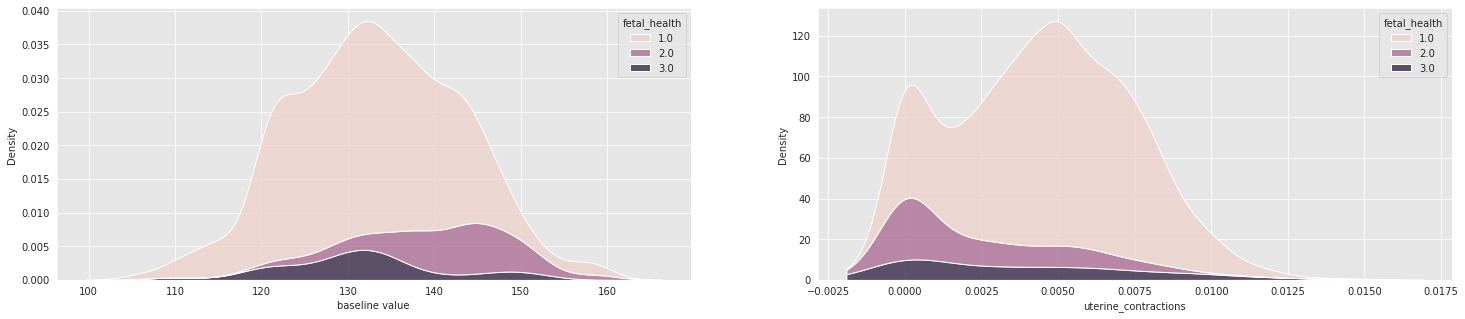

In [18]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.kdeplot(fetal_health_df['baseline value'],ax=ax[0],hue=fetal_health_df['fetal_health'],multiple="stack");
sns.kdeplot(fetal_health_df["uterine_contractions"],ax=ax[1],hue=fetal_health_df['fetal_health'],multiple="stack");

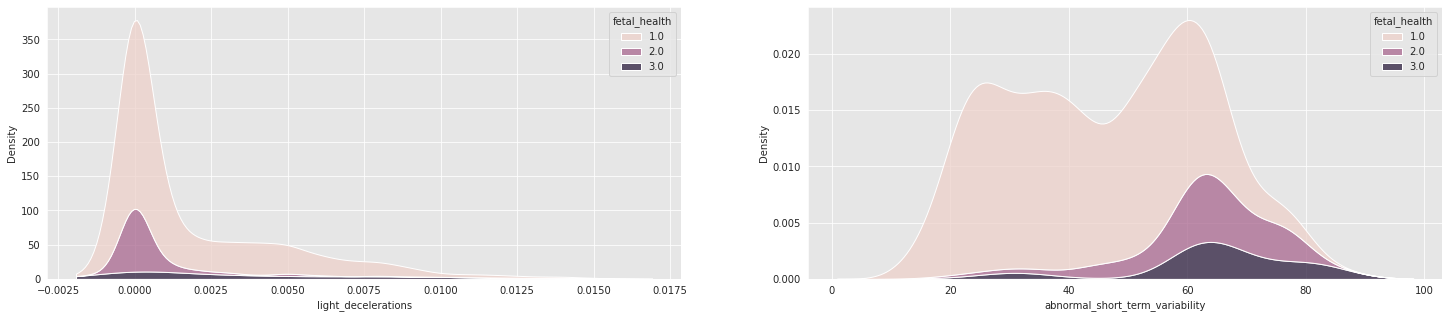

In [19]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.kdeplot(fetal_health_df['light_decelerations'],ax=ax[0],hue=fetal_health_df['fetal_health'],multiple="stack");
sns.kdeplot(fetal_health_df["abnormal_short_term_variability"],ax=ax[1],hue=fetal_health_df['fetal_health'],multiple="stack");

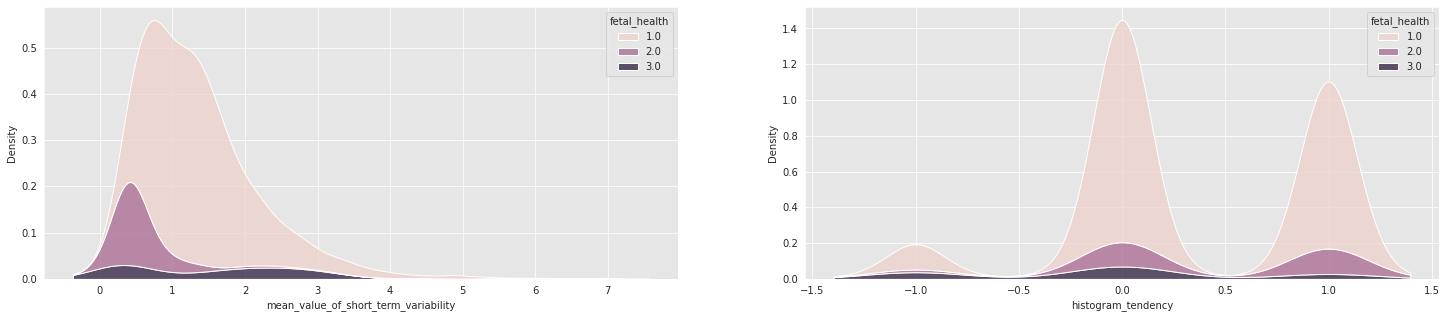

In [20]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.kdeplot(fetal_health_df['mean_value_of_short_term_variability'],ax=ax[0],hue=fetal_health_df['fetal_health'],multiple="stack");
sns.kdeplot(fetal_health_df["histogram_tendency"],ax=ax[1],hue=fetal_health_df['fetal_health'],multiple="stack");

**Insights**

- Features uterine_contractions, abnormal_short_term_variability and mean_value_of_short_term_variability can be useful classification because I think these can distinguish the class.
- For these features, we see that region of fetal health can be clustered, not completely but to an extent.

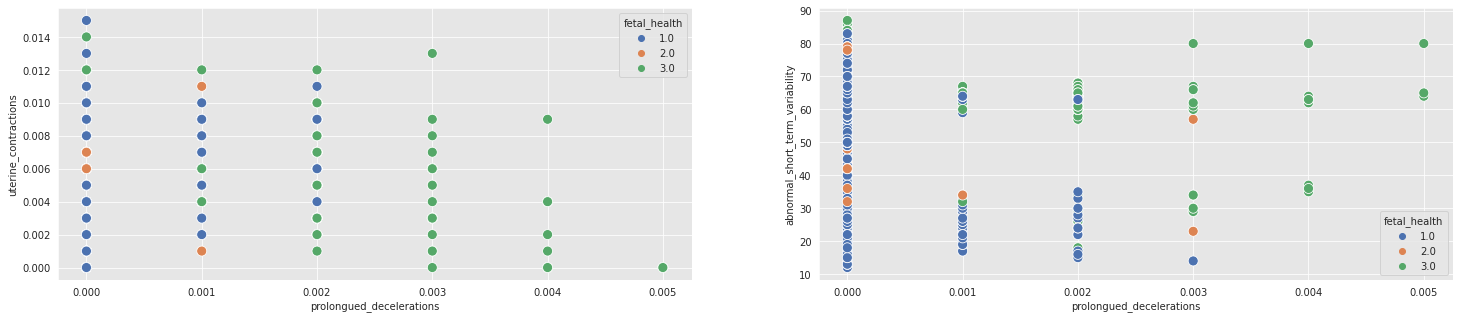

In [21]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='uterine_contractions',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='abnormal_short_term_variability',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

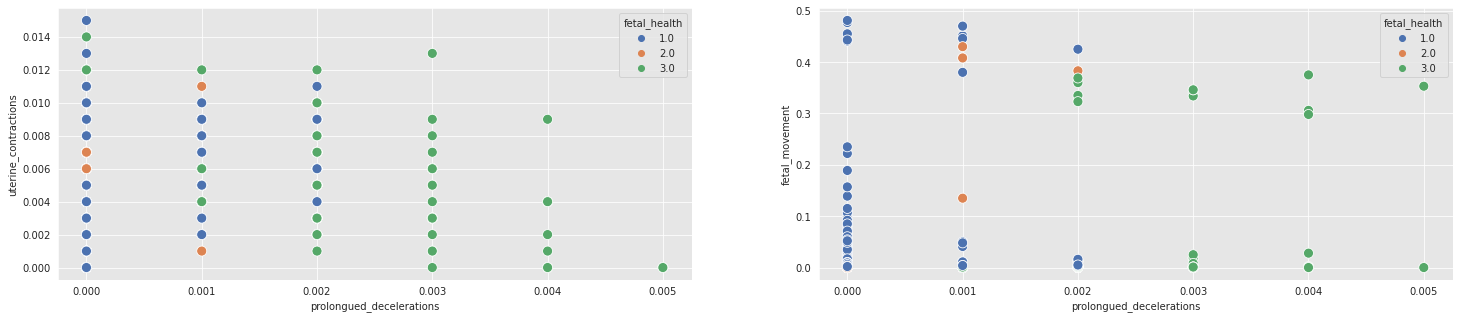

In [22]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='uterine_contractions',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='fetal_movement',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

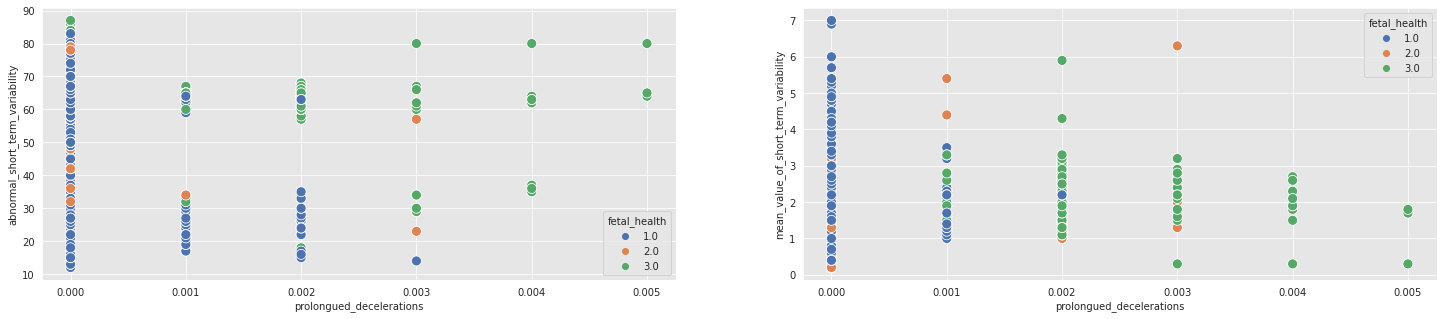

In [23]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='abnormal_short_term_variability',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='mean_value_of_short_term_variability',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

**Insights**

- From the above feature graphs, we see that fetal Pathological can be distinguished, with some error of course, but class Suspect is not easily separated.

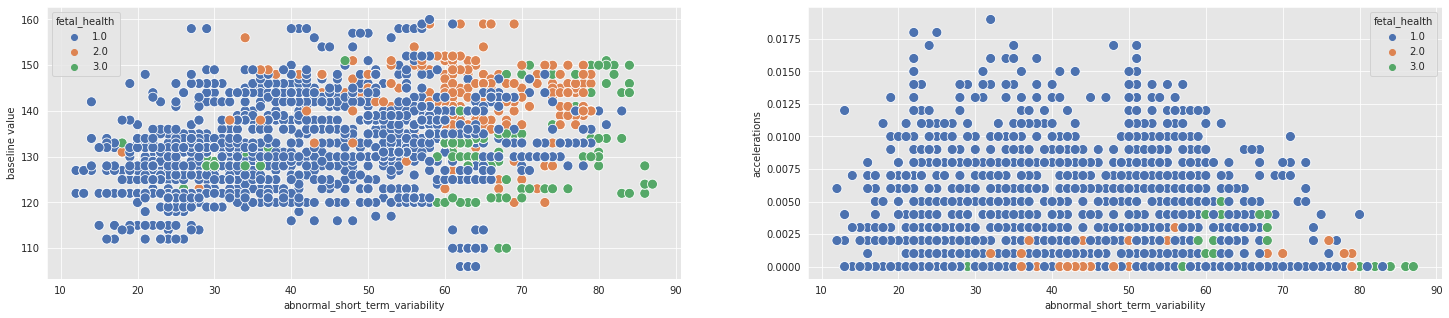

In [24]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='baseline value',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='accelerations',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

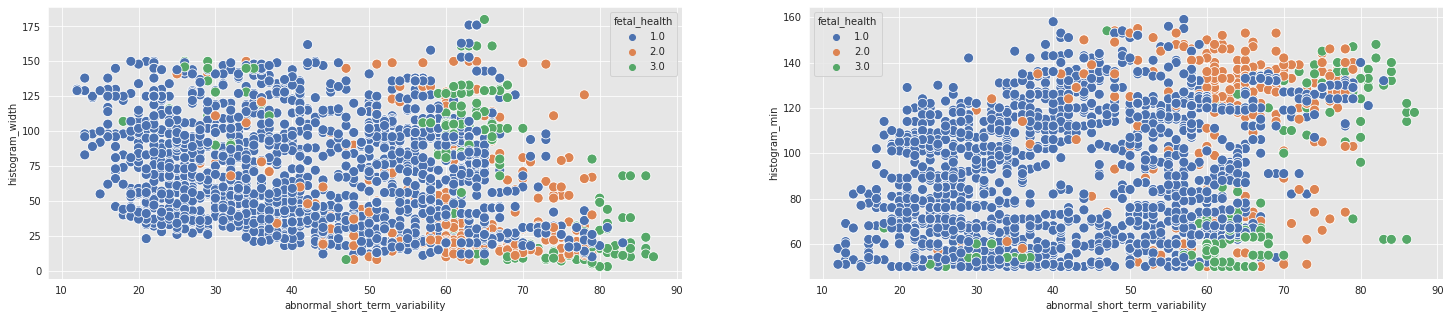

In [25]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='histogram_width',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='histogram_min',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

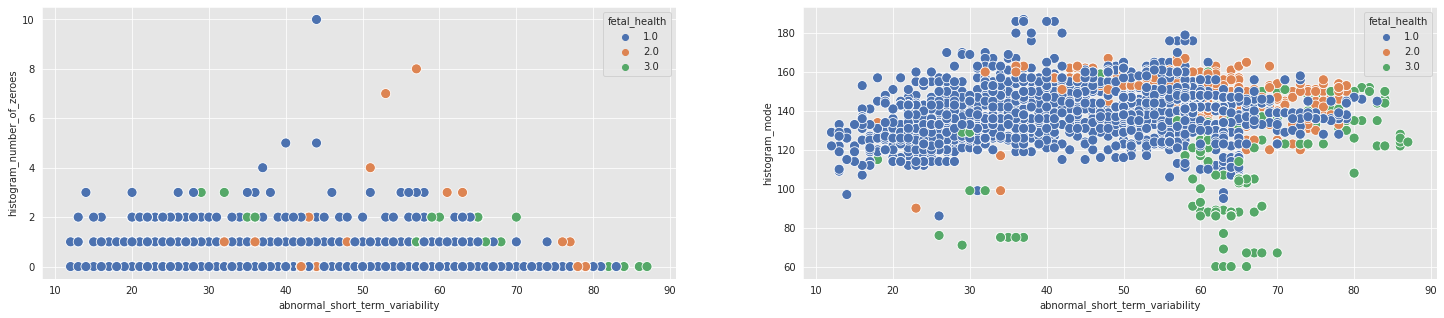

In [26]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='histogram_number_of_zeroes',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='histogram_mode',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

**Insights**

- In the plot, abnormal_short_term_variability vs baseline value there is a small cluster formed after abnormal_short_term_variability value 50 and baseline value greater than 130. Evidently, Suspect cluster is formed.
- Similarly, with the features, abnormal_short_term_variability vs histogram_min, similar cluster is formed.
- Features, abnormal_short_term_variability, histogram_min, histogram_mode, prolongued_decelerations and uterine_contractions can be useful for classification.

**Let us investigate distribution of these features:**

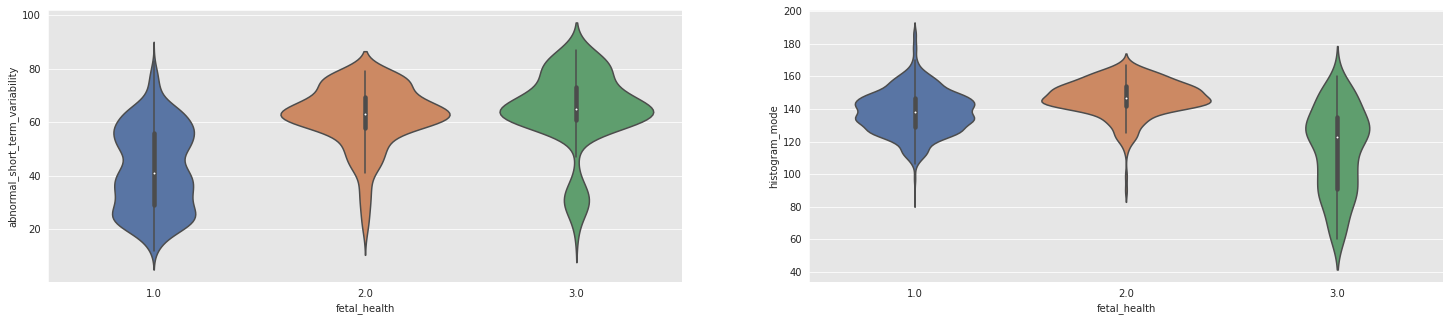

In [27]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.violinplot(data=fetal_health_df,y='abnormal_short_term_variability',x='fetal_health',palette="deep",ax=ax[0]);
sns.violinplot(data=fetal_health_df,y='histogram_mode',x='fetal_health',palette="deep",ax=ax[1]);

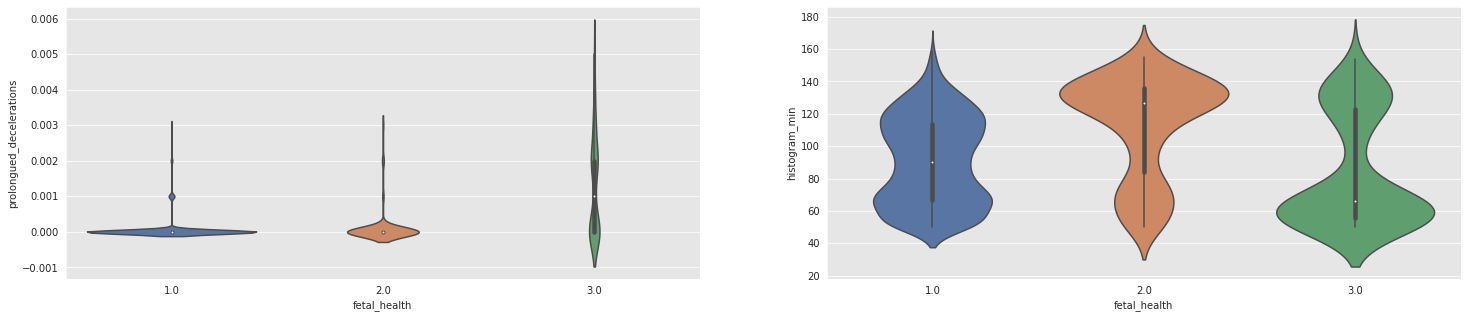

In [28]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.violinplot(data=fetal_health_df,y='prolongued_decelerations',x='fetal_health',palette="deep",ax=ax[0]);
sns.violinplot(data=fetal_health_df,y='histogram_min',x='fetal_health',palette="deep",ax=ax[1]);

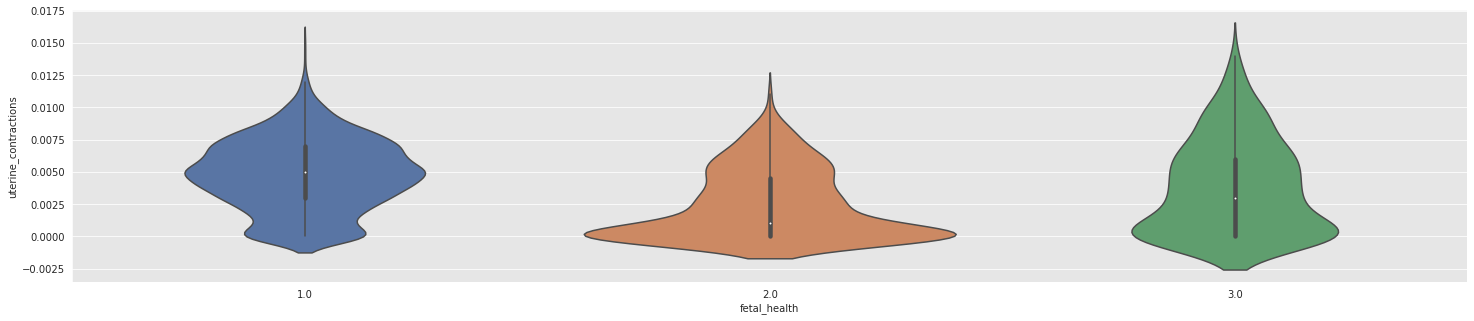

In [29]:
fig, ax =plt.subplots(figsize=(25,5))
sns.violinplot(data=fetal_health_df,y='uterine_contractions',x='fetal_health',palette="deep");

**Insights**

- In feature, abnormal_short_term_variability majority of the Suspected and Pathological points are around 60 and greater than 60.
- In feature, histogram_mode it is little difficult separate Normal and Suspected as they are in almost same distribution.
- In feature, prolongued_decelerations, Normal and Suspected values are around 0, but Pathological are distributed.
- Again, I do not see any specific pattern in histogram_min.
- In feature, uterine_contractions, Most of the points in Suspected and Pathological lies around 0, most important is that there is little proper separation for Suspected class.
